# Dependencies

In [ ]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

In [1]:
library(ggalluvial)
library(randomcoloR)

Loading required package: ggplot2



# Functions

In [50]:
source("/Users/anabbi/git/ped_CapTCRseq/R/clonetrack.R")

In [ ]:
trbbarplot.fx <- function(metadta, pat, sampletype) {
      pat_sample <- metadta[metadta$Patient == pat & metadta$sampletype == sampletype, ] # should not contain NA
      # TRB bar plot
      barpt <- ggplot(data = pat_sample, aes(y = TRB, x = basename)) +
            geom_bar(fill = "#f3b94e", colour = "#030303", stat = "identity") +
            theme(
                  axis.title.x = element_blank(),
                  axis.text.x = element_blank(),
                  axis.line = element_line(color = "black"),
                  axis.text = element_text(size = 15),
                  axis.title = element_text(size = 15),
                  legend.position = "none"
            ) +
            theme(
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  panel.background = element_rect(fill = "transparent", colour = NA),
                  panel.border = element_blank(),
                  plot.margin = unit(c(0, 0, 0, 0), "cm")
            )
      return(barpt)
}


# Paths

In [51]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [52]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [53]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [54]:
meta_div <- meta_div[ !is.na(meta_div$TRB),]

## T-ALL

In [55]:
tall <- meta_div[ meta_div$Disease_type == "T-ALL",]

In [56]:
table(tall$Patient)


CHP_324 CHP_375 CHP_387 CHP_395 
      3       6       6       2 

### 375

In [57]:
colnames(tall)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Na<U+00EF>ve"       "SCM"                "TE"                
[16] "EM."                "CM."                "Na<U+00EF>ve."     
[19] "SCM."               "TE."                "Na<U+00EF>ve.TE"   
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"

In [58]:
CHP_387 <- tall$file[ tall$Patient == "CHP_387" & tall$sampletype == "PBMC"]

In [59]:
cdr3df <- cdr3_dataframe.fx(paste0(h4hpath,"NextSeq/"), "TRB", CHP_387, "inframe")

my files:



[1] "batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt" 
[2] "batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt"
[3] "batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt"


Total recovered clonotypes:



[1] 1323


Total out-of-frame clonotypes:



[1] 334


Total clonotypes with stop codon:



[1] 26


Total productive clonotypes:



[1] 963


Output contains in_frame clonotypes only



In [60]:
p387 <- plot_clonetracks.fx(cdr3df, plotpath, "TRB", "cloneFraction", 0, "T-ALL (PBMC)", 222)

list of samples to track clones: 



[1] "CHP_387-01-PBMC-DNA" "CHP_387-02_PBMC_DNA" "CHP_387-03_PBMC_DNA"


Total number of recurring clonotypes: 



[1] 11


these are what we color: 



                           TGTGCCAGCAGCCCGACAGGGGTATACGAAAAACTGTTTTTT 
                                                            "#8495D9" 
               TGTGCCAGCAGCTTAATCGTCCGGGACAGAGCCATGAACACTGAAGCTTTCTTT 
                                                            "#D3B271" 
                           TGTGCCAGCAGGTCTAGCGGTTCCTACAATGAGCAGTTCTTC 
                                                            "#D9E260" 
                        TGTGCCAGCAGTTCCCTCAGGGGGAGCAATCAGCCCCAGCATTTT 
                                                            "#D871BC" 
                                 TGTGCCAGCAGCTTAGTAAGGGGTGAAGCTTTCTTT 
                                                            "#85EB60" 
                           TGCGCCAGCAGGCAGCGCTTAGCCAAAAACATTCAGTACTTC 
                                                            "#D5BACE" 
            TGTGCCAGCAGCCGCAATACCCAGCCCCAGGTGGGACGGTCCAATGAGCAGTTCTTC 
                                                            "#AD56E0" 
TGTGCC

In [62]:
 p2 <- trbbarplot.fx(meta_div,  "CHP_387", "PBMC")

In [63]:
#pdf(paste0(plotpath, "CHP_387_TRB.pdf"), width = 10, height = 15)
#cowplot::plot_grid(p2, p387 + theme(plot.title = element_blank()),ncol = 1, align = "v", rel_heights = c(0.2, 1))
#dev.off()

pdf 
  2

In [93]:
cairo_pdf(paste0(plotpath, "CHP_387_TRB.pdf"), width = 10, height = 15)
p387 + theme(axis.title.x = element_text(size = 15) ) + labs(y = "TCR\U03B2 clone fraction", x = "Sample prior to chemotherapy cycle") + 
scale_x_discrete(labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3"))
dev.off()

pdf 
  2

## Solid tumors

In [115]:
meta_div[ grepl("FFPE", meta_div$basename), c("Patient", "Disease_type") ]

,Patient,Disease_type
,<chr>,<chr>
159,CHP_344,BL
281,CHP_361,HD
308,CHP_364,OS
324,CHP_366,HD
354,CHP_370,ALCL
372,CHP_372,BL
426,CHP_380,HD
493,CHP_389,HD
501,CHP_390,OS


In [166]:
myCHP <- "CHP_364"

In [171]:
mycase <- meta_div$file[ meta_div$Patient == myCHP]
mycase <- mycase[ !grepl("cfDNA", mycase) ]

In [172]:
cdr3df <- cdr3_dataframe.fx(paste0(h4hpath,"NextSeq/"), "TRB", mycase, "inframe")

my files:



[1] "batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt"  
[2] "batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt"  
[3] "batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt"  
[4] "batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt"


Total recovered clonotypes:



[1] 426


Total out-of-frame clonotypes:



[1] 87


Total clonotypes with stop codon:



[1] 12


Total productive clonotypes:



[1] 327


Output contains in_frame clonotypes only



In [173]:
table(cdr3df$samplename)


CHP_364-01-PBMC-DNA CHP_364-02-PBMC-DNA CHP_364-04-PBMC-DNA CHP_364-FFPE-DNA_S1 
                125                  75                 117                  10 

In [174]:
cdr3df$samplename <- factor(cdr3df$samplename, levels = c("CHP_364-FFPE-DNA_S1", "CHP_364-01-PBMC-DNA", "CHP_364-02-PBMC-DNA", "CHP_364-04-PBMC-DNA"))

list of samples to track clones: 



[1] CHP_364-01-PBMC-DNA CHP_364-02-PBMC-DNA CHP_364-04-PBMC-DNA
[4] CHP_364-FFPE-DNA_S1
4 Levels: CHP_364-FFPE-DNA_S1 CHP_364-01-PBMC-DNA ... CHP_364-04-PBMC-DNA


Total number of recurring clonotypes: 



[1] 4


these are what we color: 



TGTGCCATCAGTGGACCCGGGACTAGCGGGAGGGCACAAGATACGCAGTATTTT 
                                             "#A3CECE" 
            TGTGCCAGCAGTGGACTAGCGGGAGCAGATACGCAGTATTTT 
                                             "#B5E079" 
               TGTGCCAGCAGTGCAGGGAACACCGGGGAGCTGTTTTTT 
                                             "#BB74D2" 
                  TGTGCCAGCAGCTTGCTAGAACAGCCCCAGCATTTT 
                                             "#DE9788" 


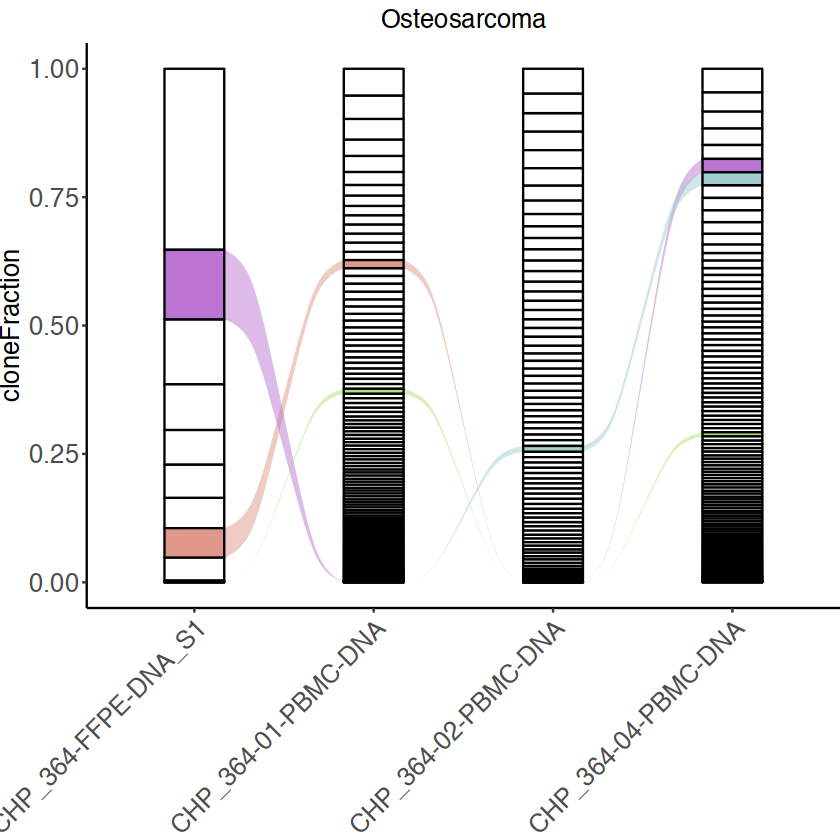

In [175]:
p <- plot_clonetracks.fx(cdr3df, plotpath, "TRB", "cloneFraction", 0, "Osteosarcoma", 422)
p

In [176]:
cairo_pdf(paste0(plotpath, "CHP_364_OS_FFPE_PBMC_TRB.pdf"), width = 10, height = 15)
p387 + theme(axis.title.x = element_text(size = 15) ) + labs(y = "TCR\U03B2 clone fraction", x = "Sample prior to chemotherapy cycle") + 
scale_x_discrete(labels = c("Tumor", "Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3"))
dev.off()

pdf 
  2